In [15]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

Load npy

In [16]:
cam=np.load('/media/ders/mazhiming/mmseg4wsss/mmsegmentation/save_npy/cam.npy')
depth_maps=np.load('/media/ders/mazhiming/mmseg4wsss/mmsegmentation/save_npy/depth_maps.npy')
labels=np.load('/media/ders/mazhiming/mmseg4wsss/mmsegmentation/save_npy/label.npy')
sal=np.load('/media/ders/mazhiming/mmseg4wsss/mmsegmentation/save_npy/sal.npy')

To Tensor

In [17]:
cam_tensor=torch.from_numpy(cam)
roll_cam_tensor=torch.roll(cam_tensor,shifts=1,dims=1)

depth_maps_tensor=torch.from_numpy(depth_maps)
labels_tensor=torch.from_numpy(labels)
sal_tensor=torch.from_numpy(sal)
b,h,w=labels.shape
roll_cam_tensor=F.interpolate(roll_cam_tensor,size=(h,w),mode='bilinear',align_corners=True)

In [18]:
from mmseg.models.losses.cross_entropy_loss import cross_entropy

In [19]:
ce_loss=cross_entropy(roll_cam_tensor,labels_tensor,ignore_index=255)
ce_loss

tensor(0.7968)

In [20]:
def make_pse_mask(cam,thr):
    cam=F.sigmoid(cam)
    cam[0,...]=thr
    pse_mask=torch.argmax(cam,dim=0)
    return pse_mask


Vis data

In [21]:
big_cam_tensor=F.interpolate(cam_tensor,size=(h,w),mode='bilinear',align_corners=True)
show_labels=labels_tensor.numpy()[1]
show_pse_mask=make_pse_mask(big_cam_tensor[1],0.3).numpy()


/media/soft/mzm/miniconda3/envs/wsss_mmseg/lib/python3.10/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


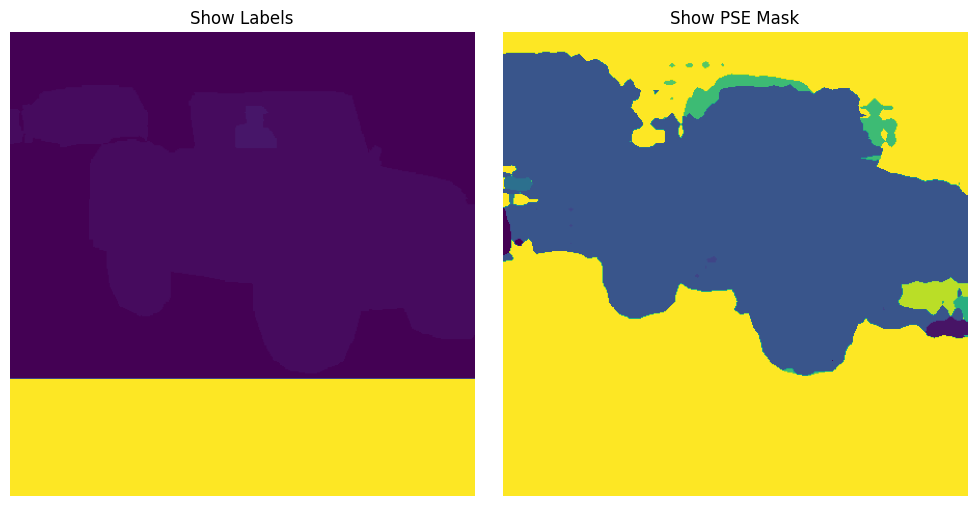

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 在第一个子图上显示 show_labels
axs[0].imshow(show_labels)
axs[0].set_title('Show Labels')
axs[0].axis('off')

# 在第二个子图上显示 show_pse_mask
axs[1].imshow(show_pse_mask)
axs[1].set_title('Show PSE Mask')
axs[1].axis('off')

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

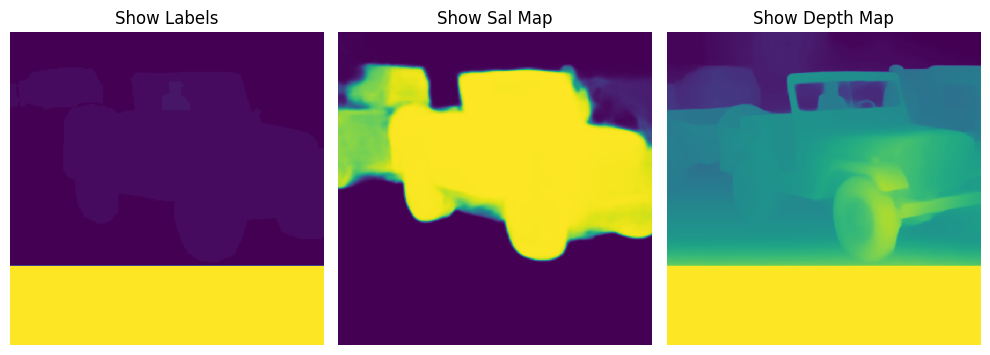

In [25]:
sal_tensor=torch.from_numpy(sal)
show_sal=sal_tensor.numpy()[1]
show_depth=depth_maps_tensor.numpy()[1]

fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].imshow(show_labels)
axs[0].set_title('Show Labels')
axs[0].axis('off')

# 在第二个子图上显示 show_pse_mask
axs[1].imshow(show_sal.transpose(1,2,0))
axs[1].set_title('Show Sal Map')
axs[1].axis('off')

axs[2].imshow(show_depth.transpose(1,2,0))
axs[2].set_title('Show Depth Map')
axs[2].axis('off')

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

In [14]:
np.unique(depth_maps_tensor.numpy()[1])

array([  1.3333334,   2.       ,   2.6666667,   3.3333333,   4.3333335,
         5.3333335,   6.       ,   7.       ,   8.333333 ,   9.       ,
        10.666667 ,  11.666667 ,  13.       ,  14.       ,  15.333333 ,
        17.       ,  18.       ,  19.333334 ,  20.666666 ,  22.       ,
        23.333334 ,  25.       ,  26.       ,  27.666666 ,  29.       ,
        30.       ,  32.       ,  33.       ,  34.666668 ,  35.666668 ,
        37.       ,  38.333332 ,  39.666668 ,  41.       ,  42.333332 ,
        43.666668 ,  44.666668 ,  45.666668 ,  47.       ,  48.333332 ,
        49.333332 ,  50.333332 ,  51.333332 ,  52.333332 ,  53.333332 ,
        54.333332 ,  55.       ,  56.       ,  57.       ,  57.666668 ,
        59.       ,  60.       ,  60.666668 ,  61.333332 ,  62.666668 ,
        63.333332 ,  64.333336 ,  65.       ,  66.       ,  66.666664 ,
        67.666664 ,  68.333336 ,  69.333336 ,  69.666664 ,  71.       ,
        71.666664 ,  72.333336 ,  73.333336 ,  73.666664 ,  74.6

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [21.],
       [24.],
       [ 2.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 3.],
       [ 5.],
       [ 0.],
       [ 4.],
       [ 3.],
       [ 2.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 2.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 2.],
       [ 7.],
       [11.],
       [ 0.],
       [ 5.],
       [ 7.],
       [ 2.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
      

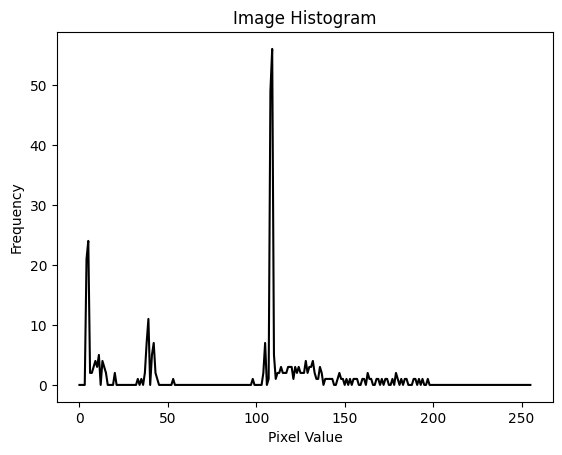

In [10]:
sigle_depth_map=depth_maps_tensor[1]
import cv2
# 计算直方图
# show_depth[show_depth==255]=0
hist = cv2.calcHist([show_depth], [0], None, [256], [0, 255])

# 绘制直方图
plt.plot(hist, color='black')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Image Histogram')
hist

In [11]:
equalized_image = cv2.equalizeHist(show_depth)
hist = cv2.calcHist([equalized_image], [0], None, [256], [0, 255])

过滤操作

In [12]:
# # show_depth[(show_depth<=25)&(show_depth>=100)]=0
# show_depth[show_depth>50]=0
# show_depth[show_depth<36]=0
# plt.imshow(show_depth.transpose(1,2,0))

In [13]:
# show_depth[show_depth<100]=0
# plt.imshow(show_depth.transpose(1,2,0))

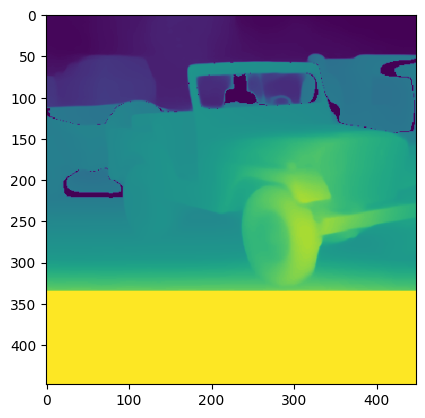

In [14]:
show_depth[(show_depth>=104)&(show_depth<=106)]=0

plt.imshow(show_depth.transpose(1,2,0))

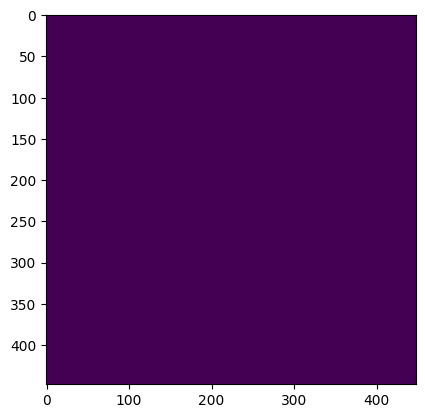

In [15]:
show_depth[show_depth<104]=0
show_depth[show_depth>106]=0
plt.imshow(show_depth.transpose(1,2,0))

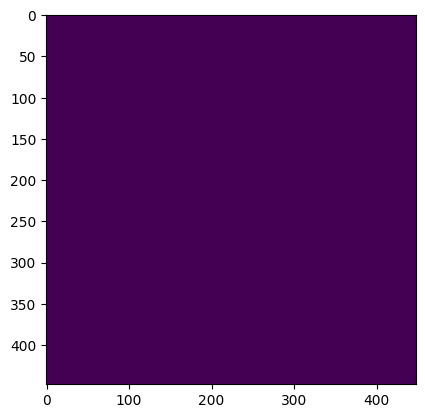

In [16]:
show_depth[show_depth<110]=0
plt.imshow(show_depth.transpose(1,2,0))

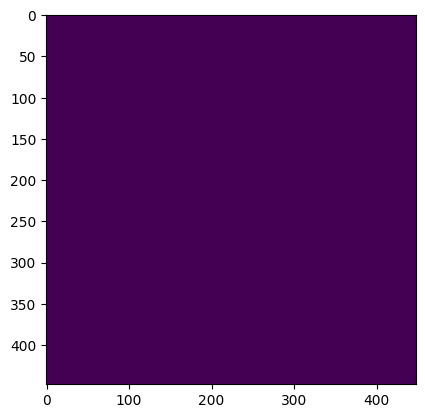

In [17]:
show_depth[show_depth<120]=0
plt.imshow(show_depth.transpose(1,2,0))

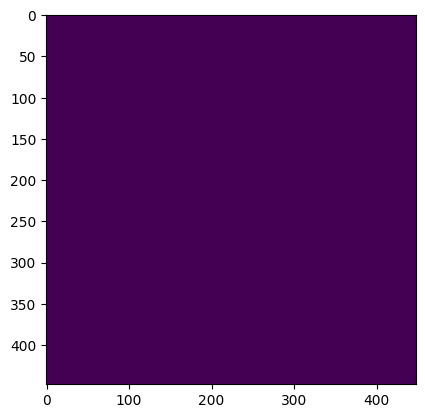

In [18]:
show_depth[show_depth<150]=0
plt.imshow(show_depth.transpose(1,2,0))